In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from forecast.weather import get_weather_data, get_train_test_sets, forecast_weather, forecast_weather_one_window

sns.set(font_scale=1.5, palette='colorblind')

/usr/local/Cellar/python/3.6.5/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


# Weather forecast

In [2]:
weather_data_path = '~/workspace/ds/data/AMPds/Climate_HourlyWeather.csv'
X, scaler = get_weather_data(weather_data_path)
X_train, X_test = get_train_test_sets(X)

In [3]:
X_train.shape, X_test.shape

((12230, 4), (5241, 4))

## Plot temperature prediction

In [4]:
X = np.concatenate((X_train, X_test))
predictions = forecast_weather(X)

Iteration 0


In [5]:
predictions.shape

(17473, 4)

In [6]:
len(X_train) + len(X_test) + 24

17495

In [7]:
X_predictions = scaler.inverse_transform(predictions)
X_train_p = scaler.inverse_transform(X_train)
X_test_p = scaler.inverse_transform(X_test)

In [8]:
def plot_attribute(X_train, X_test, X_predictions, attr):
    attributes = ['Temp (C)', 'Dew Point Temp (C)', 'Visibility (km)', 'Stn Press (kPa)']
    attr_idx = attributes.index(attr)
    
    f, ax = plt.subplots(1, figsize=(20, 8))
    
    x = range(len(X_predictions))
    train_trace = np.concatenate((X_train[:,attr_idx], [float('nan')] * (len(X_test) + 24)))
    test_trace = np.concatenate(([float('nan')] * len(X_train), X_test[:,attr_idx], [float('nan')] * 24))
    
    ax.plot(x, train_trace, label='Train')
    ax.plot(x, test_trace, label='Test')
    ax.plot(x, X_predictions[:,attr_idx], label='Prediction')
    
    ax.set_title(f'{attr} - Actual and Forecast')
    ax.legend()

ValueError: x and y must have same first dimension, but have shapes (17473,) and (17495,)

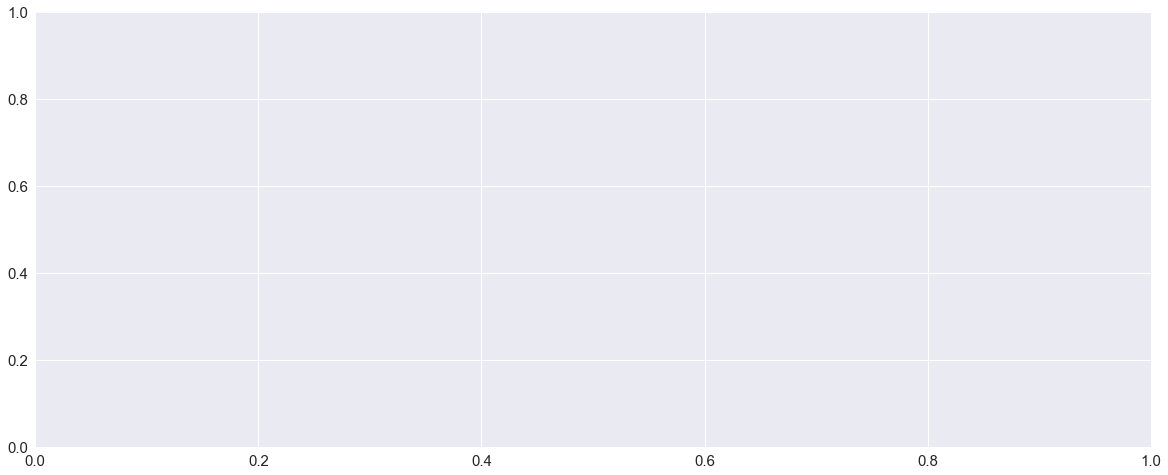

In [9]:
plot_attribute(X_train_p, X_test_p, X_predictions, 'Stn Press (kPa)')

In [ ]:
i = 5000
x = X_train[i: i+24]
predictions_one = forecast_weather_one_window(x)

In [ ]:
x_p = scaler.inverse_transform(x)
predictions_one_p = scaler.inverse_transform(predictions_one)

f, ax = plt.subplots(1, figsize=(15, 8))
x_ax = range(len(predictions_one) + 1)
ax.plot(x_ax, x_p[:,3].flatten().tolist() + [float('nan')] )
ax.plot(x_ax, [float('nan')] + predictions_one_p[:,3].flatten().tolist())